# Bike store sales

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
#reading the data
#df=pd.read_csv("Resources/sales_data.csv",index_col=0)
df=pd.read_csv("Resources/sales_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [22]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


### The informaiton from summary_table
 
   ##### This data is from <b>2011 to <b>2016.
   ##### The Average of Customer_Age was 36, youngest customer was 17 years old and the oldest was 87!
   ##### the maximum profit was 5342 and minimum -24!
   ##### the maximum Revenue was 14026 and minimum 2!
   

### 

### Customer_age in every country 

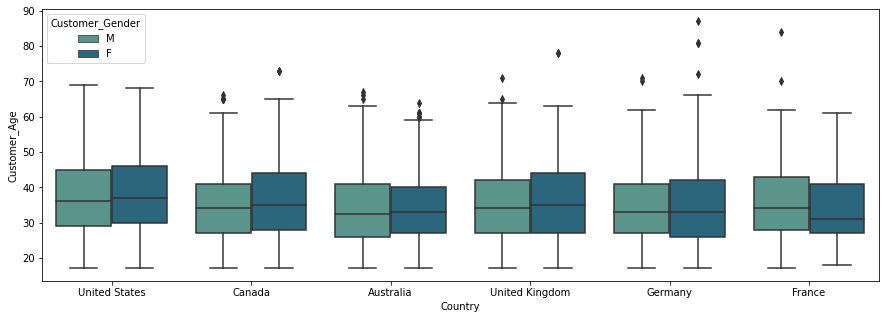

In [84]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Country", y="Customer_Age", hue="Customer_Gender",data=df, palette="crest")

### The products that were ordered by customer with age more than 80

In [69]:
df[df['Customer_Age']>=80]['Product']

298       Touring Tire Tube
3953           LL Road Tire
4446    Patch Kit/8 Patches
4921      Touring Tire Tube
Name: Product, dtype: object

### Detecting any relationships between columns

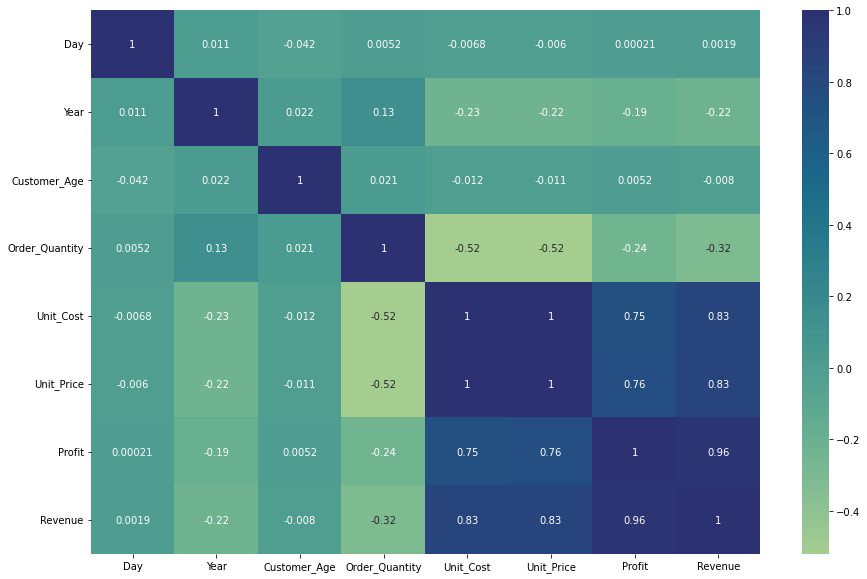

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='crest')

##### The correlation between Unit_Cost and Unit_Price is one and between Profit and Revenue is near one

### Any relationship between order_quantity and Profit in the different countries and years and product categories!?

<Figure size 1080x720 with 0 Axes>

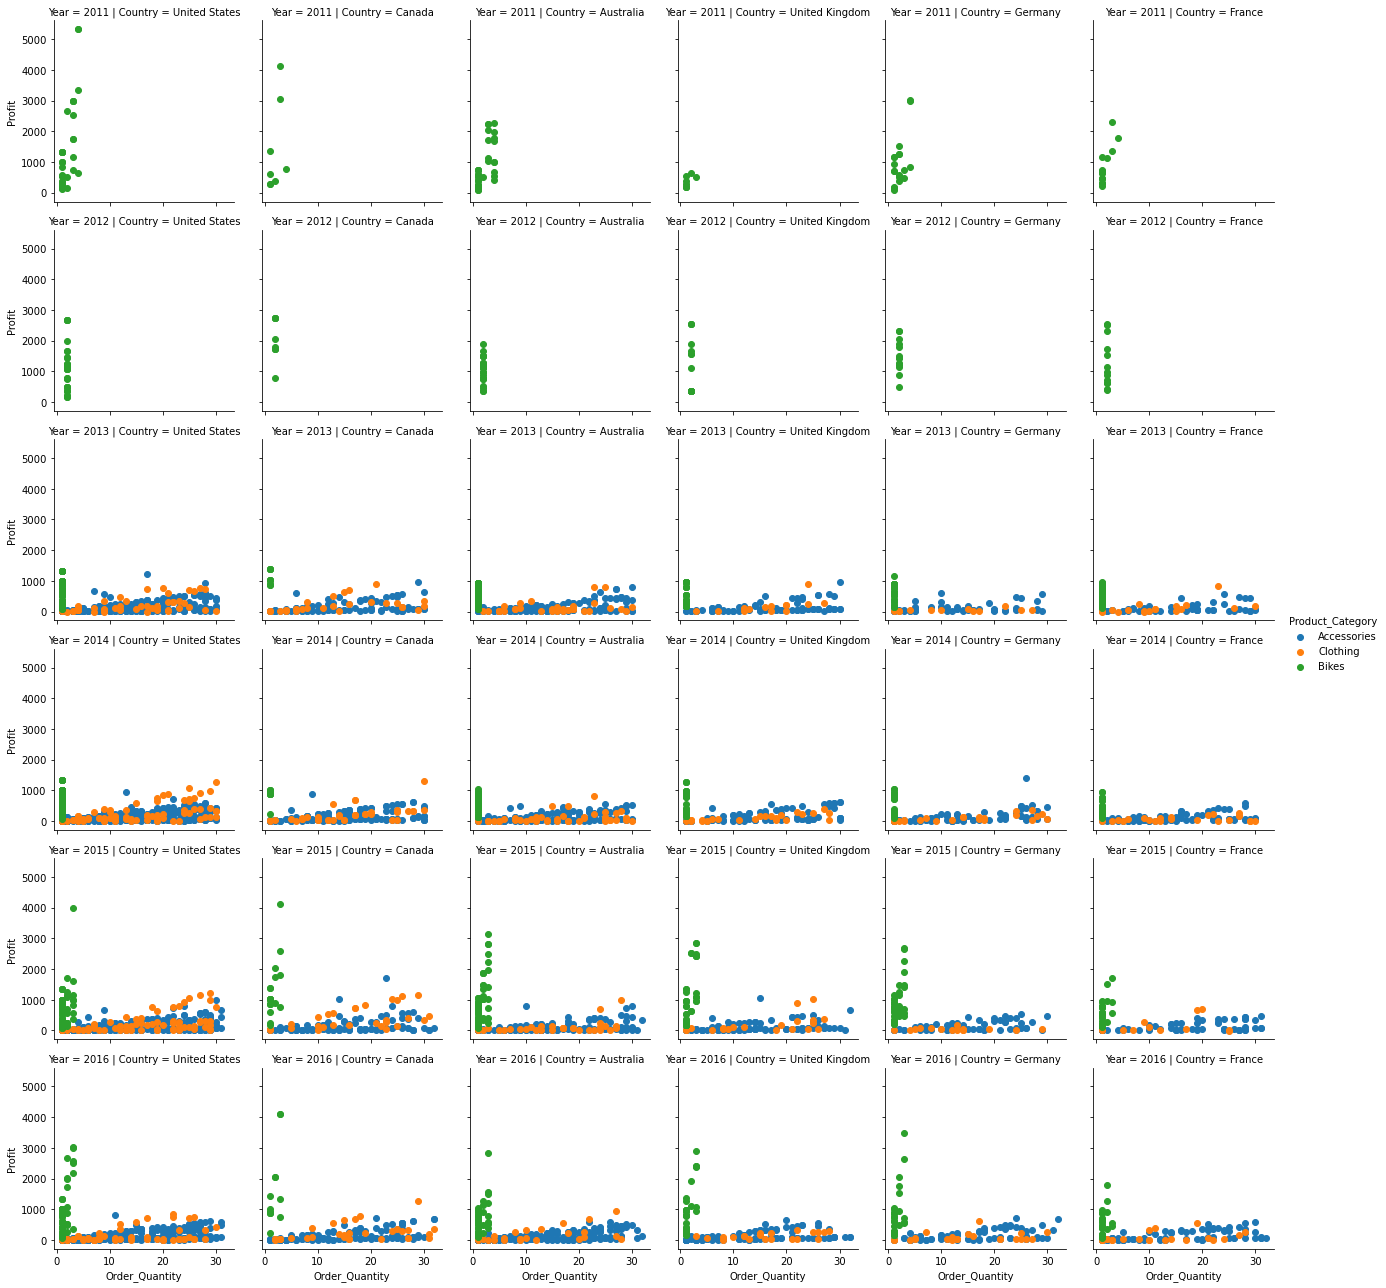

In [79]:
plt.figure(figsize=(15,10))
g=sns.FacetGrid(df,col='Country',row='Year',hue='Product_Category')
g.map(plt.scatter,'Order_Quantity','Profit',cmap='crest').add_legend()


### How many order were made in every month in 2011_2016?

In [80]:
order_number=df.groupby(['Month','Year']).count()['Product'].reset_index()
order_number=order_number.pivot(index="Month", columns="Year")
order_number.fillna(0,inplace=True)
order_number

Product                                  
Year         2011  2012   2013   2014   2015   2016
Month                                              
April        12.0   8.0   14.0  210.0   10.0  218.0
August       12.0  14.0  170.0    0.0  161.0    0.0
December     12.0   7.0  215.0    0.0  232.0    0.0
February      6.0   6.0   16.0  192.0   10.0  152.0
January       9.0  13.0   12.0  182.0   12.0  193.0
July         12.0  13.0   53.0  115.0   79.0   92.0
June          6.0   9.0   12.0  215.0   16.0  211.0
March        15.0   4.0    8.0  203.0   10.0  192.0
May          13.0   8.0   16.0  210.0   13.0  214.0
November      9.0   8.0  174.0    0.0  207.0    0.0
October      12.0  13.0  189.0    0.0  192.0    0.0
September     8.0   9.0  161.0    0.0  181.0    0.0

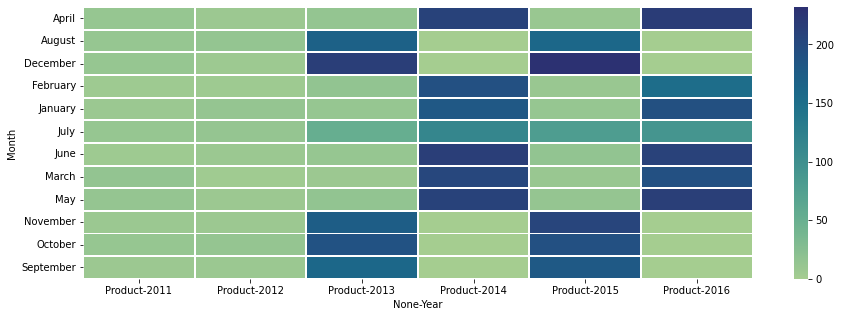

In [81]:
plt.figure(figsize=(15,5))
sns.heatmap(order_number,cmap='crest',linecolor='white',linewidths=1)

### Countries with the most and least order?

In [12]:
print(f"The country with the most sales:\n {df['Country'].value_counts().head(1)}")
print()
print(f"The country with the least sales:\n {df['Country'].value_counts().tail(1)}")

The country with the most sales:
 United States    1700
Name: Country, dtype: int64

The country with the least sales:
 Germany    484
Name: Country, dtype: int64


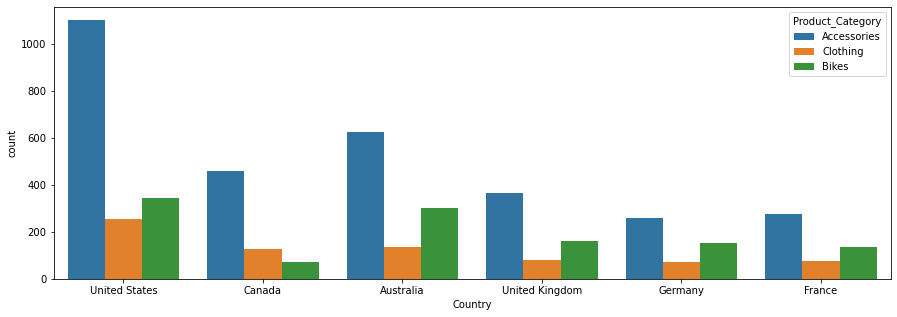

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(x='Country',data=df, hue='Product_Category')

### The state of United States with the most and least sales

In [13]:
print(f"The state with the most sales:\n {df['State'].value_counts().head(1)}")
print()
print(f"The state with the least sales:\n {df['State'].value_counts().tail(1)}")

The state with the most sales:
 California    959
Name: State, dtype: int64

The state with the least sales:
 Missouri    1
Name: State, dtype: int64


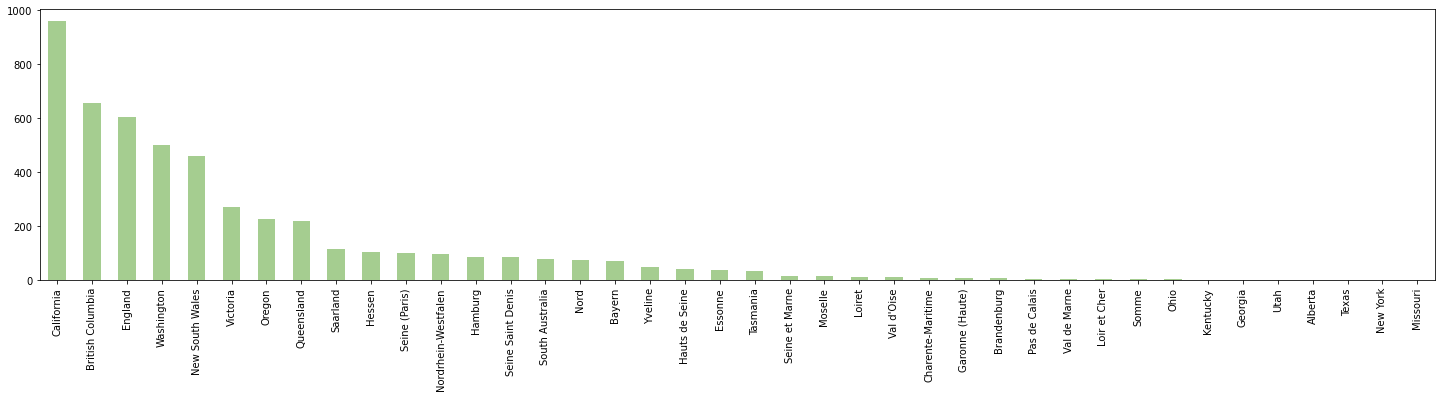

In [87]:
df['State'].value_counts().plot(kind='bar', figsize=(25,5),cmap='crest')

### The maximum and minimum of Profit and Revenue in 3 product category

In [88]:
df.groupby(['Product_Category']).max()[['Profit','Revenue']]

,Profit,Revenue
Product_Category,,
Accessories,1697,2732
Bikes,5342,14026
Clothing,1299,2079


In [89]:
df.groupby(['Product_Category']).min()[['Profit','Revenue']]

,Profit,Revenue
Product_Category,,
Accessories,1,2
Bikes,66,410
Clothing,-24,7


### Days with the maximum and minimum profit?

In [90]:
df[df['Profit']==-24]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4499,2015-07-22,22,July,2015,45,F,France,Yveline,Clothing,Jerseys,"Short-Sleeve Classic Jersey, S",25,42,54,-24,1026


In [91]:
df[df['Profit']==5342]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
743,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14026
2686,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14026


## The ten most sale product

In [92]:
df['Product'].value_counts().head(10)

Water Bottle - 30 oz.      490
Patch Kit/8 Patches        441
Mountain Tire Tube         292
Sport-100 Helmet, Blue     187
Sport-100 Helmet, Red      185
AWC Logo Cap               184
Fender Set - Mountain      183
Sport-100 Helmet, Black    181
Touring Tire Tube          173
Road Tire Tube             168
Name: Product, dtype: int64

## The order_quantity of orders more than 10K in revenue

In [95]:
df[df['Revenue']>=10_000]['Order_Quantity']

743     4
1490    3
1847    3
2076    3
2686    4
2826    3
3530    3
Name: Order_Quantity, dtype: int64